<a href="https://colab.research.google.com/github/eemaansheikh/Data_Science_2025/blob/main/EemaanSheikh_Unit2Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question: What is the probaility that a Mexican restaurant in downtown Austin can attain a 4.5 rating or above?

Using a data set of the ratings of 50 mexican restaurants in downtown Austin, 38% of restaurants had a 4.5 or higher (or 19 restaurants in the 50 number set).

Numerically:

p = 38%

k = 19

n = 50

**Prior & Likelihood**

In [ ]:
##19 of 50 qualify, 31 of 50 don't
#theta ~ Beta(a=19, b=31)

!pip install preliz
!pip install numpy



import preliz as pz
import numpy as np
import arviz as az
import pymc as pm
#FIGURE ONE
#plotting the beta distribution with shape parameter 19 and scale parameter 31
pz.Beta(alpha=19,beta=31).plot_pdf()

In [ ]:
#"predicting wemby ft in 24/25"
#Restaurants in downtown ATX, with a rating of 4.5 or higher then not
FT_data_2324 = np.repeat([1,0], repeats = [19,31])

In [ ]:


with pm.Model() as wmby_FT_2324_model:
  #same prior from before based on restaurant data
  θ = pm.Beta('θ' , alpha = 1.9 , beta = 3.1)

  #same likelihood, with our stand in for the binomial distribution
  #but with the updated data
  y = pm.Bernoulli('y', p = θ, observed = FT_data_2324)

  #sample from the posterior, 2000 for a more prcise picture later
  idata_FT_2324 = pm.sample(2000)



<Axes: title={'center': 'θ'}>

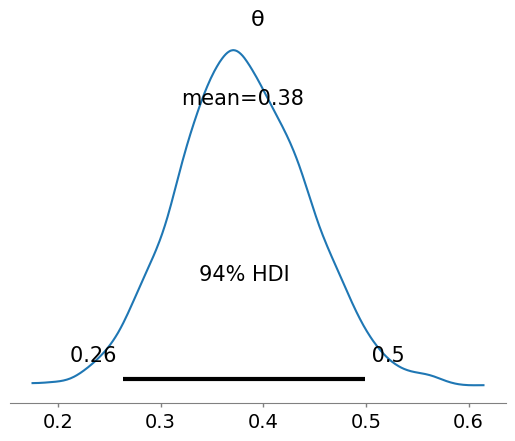

In [ ]:
##FIGURE 2
#vizualize the 2000 samples from the pymc model of the posterior
az.plot_posterior(idata_FT_2324)

Question: What is the probaility that a Mexican restaurant in downtown Austin can atttain a 4.5 rating or above?

For this project, I investigated the probability of a Mexican restaurant operating succesfully in downtown Austin. My metric of "success" was decided upon whether the restaurant was able to attain a Google rating of 4.5 or higher. A beta-binomial model is an effective way of analyzing the data set, since it conveys a probability between success and failure.

I collected a data set by using Google Maps. From the search and filter for Mexican Restaurants in "downtown atx", I noted 50 places and their numerical review. The data was as follows:


*   n (total items) = 50
*   k (items at or above 4.5) = 19
*   p (probability as a percentage) = 38


From these numbers, the prior used to produce the graphs was (1.9 , 3.1), where a (success) = 19 and b (Failure) = 31.
The generated graph represented the predicted 38% probaility of success by presenting a peak mean value of 0.38.
The conclusion of the BetaBinomial model is that a Mexican Restaurant in downtown ATX has 38% probability of attaining a rating of 4.5 or higher.


Potential error in these conclusions could lie in the relatively small size of the dataset, which may not accurately represent all of downtown Austin. I am also unable to clarify the spread of said restaurants, given the efficient collection of data entailed referencing a list produced by Maps, not a visual distribution of restaurants; while this may lead to potential clustering, it isn't too likely due to the overall compactness of downtown Austin. Finally, Google reviews can be subjective, as ratings are fueled by individual customer experiences (a rare outage of a specific dish, one bad waiter, or even the mood of the customer) that are generated more by emotional value than practicality.